In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##EDA

In [4]:
df = pd.read_excel('/content/foc-data.xlsx')

In [6]:
df.head(3)

,Case Record 18-digit ID,Alternate database client #,Enrolled Date,Enrolled Year,Client: Full Name,Gender,Client: Mailing Zip/Postal Code,Client: Birthdate,Unnamed: 8,Client: Marital Status,Client: Race,Client: FFT Ethnicity,Client: Primary Language,Client: Client Household: Household Size,Client: Client Household: Household Members Seniors,Client: Client Household: Household Members Under 18,Client: Living Arrangement,Client: Highest Grade Completed,Client: Voc. Training/Bridge Program History,Client: In school/training at program entry?,"Client: For past 12 mos, # of full months worked",Client: Health Insurance Status,Client: Criminal Convictions,Client: Military Status,Client Household: Your Gross Household Income,"Client: For past 12 mos, earned income after tax",Client: Working at program entry?,Client: Primary Interest at Program Entry,Number of Direct Services,Number of Services,Reasons for Exit
0,a0t1Q00000NSnU4QAL,NaN,2022-02-01,2022,Khanh Ly,Female,77083,1946-02-10,76,Single (never married),Asian,Non-Hispanic,Chinese,2.0,2.0,0.0,Subsidized,No High School Diploma/Equivalency,No vocational training/bridge program history,No,NaN,Insured through a government program (e.g. Med...,No Convictions,Never Served,10440.0,NaN,Retired,Income Supports/Public Benefits,NaN,NaN,NaN
1,a0t1Q00000NSlYZQA1,NaN,2022-01-19,2022,Steve Gunderson,Male,77072,1955-07-09,67,Single (never married),Client declined to answer,Client declined to answer,English,2.0,2.0,0.0,Owner,Bachelor,No vocational training/bridge program history,No,NaN,Insured through a government program (e.g. Med...,No Convictions,Never Served,0.0,NaN,Unemployed and looking for work,Income Supports/Public Benefits,NaN,NaN,NaN
2,a0t1Q00000NSlMEQA1,NaN,2022-01-18,2022,Carnessia Rhodes,Female,77063,1992-10-14,30,Single (never married),African American/Black,Non-Hispanic,English,4.0,0.0,2.0,Unsubsidized,Some College,Completed vocational training/bridge program(s),Yes,NaN,No insurance at all,No Convictions,Never Served,8448.0,NaN,Employed part time,Job Placement/Career Development,NaN,NaN,NaN


In [9]:
#1795 rows and 31 columns

df.shape

(1795, 31)

In [10]:
df.dtypes

Case Record 18-digit ID                                         object
Alternate database client #                                     object
Enrolled Date                                           datetime64[ns]
Enrolled Year                                                    int64
Client: Full Name                                               object
Gender                                                          object
Client: Mailing Zip/Postal Code                                 object
Client: Birthdate                                       datetime64[ns]
Unnamed: 8                                                       int64
Client: Marital Status                                          object
Client: Race                                                    object
Client: FFT Ethnicity                                           object
Client: Primary Language                                        object
Client: Client Household: Household Size                       float64
Client

In [11]:
df.describe

<bound method NDFrame.describe of      Case Record 18-digit ID  ...          Reasons for Exit
0         a0t1Q00000NSnU4QAL  ...                       NaN
1         a0t1Q00000NSlYZQA1  ...                       NaN
2         a0t1Q00000NSlMEQA1  ...                       NaN
3         a0t1Q00000NSlOFQA1  ...                       NaN
4         a0t1Q00000NSlPNQA1  ...                       NaN
...                      ...  ...                       ...
1790      a0t36000005mQZXAA2  ...                       NaN
1791      a0t36000005mQZYAA2  ...                     Other
1792      a0t36000005mQZZAA2  ...  No service for 12 months
1793      a0t36000005mM6kAAE  ...  No service for 12 months
1794      a0t36000007FWUcAAO  ...                     Other

[1795 rows x 31 columns]>

In [12]:
# Missing values

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values(by=['percent_missing'], ascending=False)

,percent_missing
Number of Services,94.818942
Number of Direct Services,94.818942
Reasons for Exit,82.618384
"Client: For past 12 mos, earned income after tax",80.055710
Client: Military Status,72.033426
"Client: For past 12 mos, # of full months worked",71.086351
Client Household: Your Gross Household Income,67.130919
Client: Health Insurance Status,66.128134
Client: Working at program entry?,64.568245
Client: In school/training at program entry?,64.122563


In [18]:
# Duplicate values
percentage = df.duplicated(keep=False).value_counts(normalize=True) * 100
percentage

False    100.0
dtype: float64

Text(0, 0.5, 'Enrolled Year')

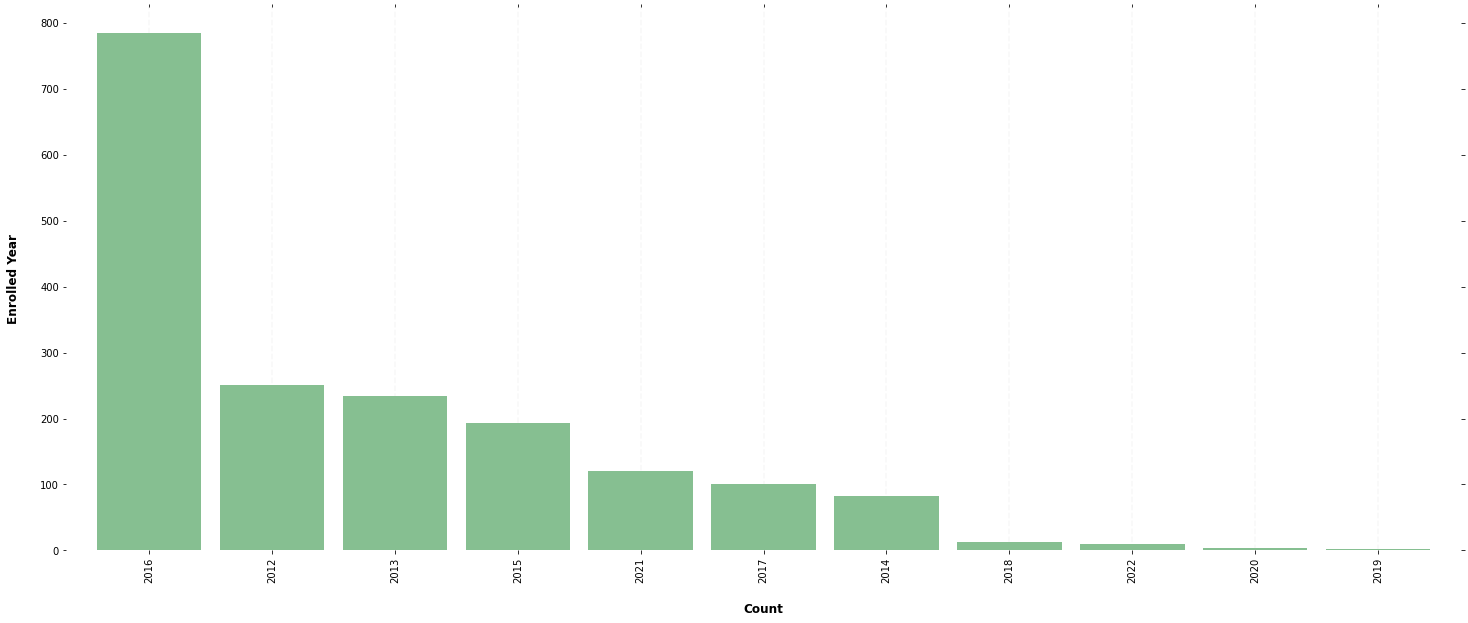

In [51]:
# Enroll year

enroll_year = df['Enrolled Year'].value_counts().sort_values(ascending=False)
ax = enroll_year.plot(kind='bar', figsize=(25, 10), color='#86bf91', zorder=2, width=0.85)

#Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
     ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_xlabel("Count", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Enrolled Year", labelpad=20, weight='bold', size=12)

In [52]:
# Top 10 dates with most enrollment

df['Enrolled Date'].value_counts().head(10)

2016-06-17    73
2016-06-16    73
2016-05-27    59
2016-05-06    58
2016-06-09    47
2016-07-22    33
2016-11-22    31
2015-11-10    31
2016-09-28    29
2016-03-18    28
Name: Enrolled Date, dtype: int64

In [61]:
#Rename age column and count values

df = df.rename(columns={'Unnamed: 8': 'Age'})
df['Age'].value_counts().sort_values(ascending=False).head(10)

32    71
42    71
68    40
40    38
67    36
45    35
47    34
52    34
51    34
54    33
Name: Age, dtype: int64

In [79]:
df['Client: Client Household: Household Members Seniors'].value_counts()

0.0    1404
1.0     367
2.0      12
3.0      11
Name: Client: Client Household: Household Members Seniors, dtype: int64

In [80]:
df['Client: Client Household: Household Members Under 18'].value_counts()

0.0    1646
1.0      93
2.0      31
3.0      13
4.0      10
6.0       1
Name: Client: Client Household: Household Members Under 18, dtype: int64

In [65]:
# See some data entry error, Enrollment date is entered as client's birthdate. 

df['Age'].min()
df.loc[df['Age'] == df['Age'].min()]


,Case Record 18-digit ID,Alternate database client #,Enrolled Date,Enrolled Year,Client: Full Name,Gender,Client: Mailing Zip/Postal Code,Client: Birthdate,Age,Client: Marital Status,Client: Race,Client: FFT Ethnicity,Client: Primary Language,Client: Client Household: Household Size,Client: Client Household: Household Members Seniors,Client: Client Household: Household Members Under 18,Client: Living Arrangement,Client: Highest Grade Completed,Client: Voc. Training/Bridge Program History,Client: In school/training at program entry?,"Client: For past 12 mos, # of full months worked",Client: Health Insurance Status,Client: Criminal Convictions,Client: Military Status,Client Household: Your Gross Household Income,"Client: For past 12 mos, earned income after tax",Client: Working at program entry?,Client: Primary Interest at Program Entry,Number of Direct Services,Number of Services,Reasons for Exit
186,a0t36000008nKzuAAE,NaN,2017-07-21,2017,Win Than,NaN,NaN,2017-07-21,5,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,a0t36000008nL0OAAU,NaN,2017-07-21,2017,Terri Crawford,NaN,NaN,2017-08-26,5,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,a0t36000008ldZ1AAI,NaN,2017-07-10,2017,Iantha Woods,Female,77291,2017-12-24,5,Single (never married),African American/Black,Non-Hispanic,English,1.0,0.0,0.0,Subsidized,College Certificate (non-credit bearing),Some vocational training/bridge program(s),No,12.0,Insured through a government program (e.g. Med...,Convicted of Misdemeanor(s) only,Veteran,NaN,20000.0,Yes,Job Placement/Career Development,7.0,3.0,NaN
200,a0t36000008lAx7AAE,NaN,2017-06-29,2017,Kelly Brown,Female,77099,2017-06-29,5,Single (never married),African American/Black,Non-Hispanic,English,1.0,0.0,1.0,NaN,College Certificate (non-credit bearing),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,a0t36000008lAxHAAU,NaN,2017-06-29,2017,Christina Higgins,Female,NaN,2017-06-29,5,NaN,Caucasian/White,Non-Hispanic,English,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df.loc[df['Age'] == df['Age'].max()]

,Case Record 18-digit ID,Alternate database client #,Enrolled Date,Enrolled Year,Client: Full Name,Gender,Client: Mailing Zip/Postal Code,Client: Birthdate,Age,Client: Marital Status,Client: Race,Client: FFT Ethnicity,Client: Primary Language,Client: Client Household: Household Size,Client: Client Household: Household Members Seniors,Client: Client Household: Household Members Under 18,Client: Living Arrangement,Client: Highest Grade Completed,Client: Voc. Training/Bridge Program History,Client: In school/training at program entry?,"Client: For past 12 mos, # of full months worked",Client: Health Insurance Status,Client: Criminal Convictions,Client: Military Status,Client Household: Your Gross Household Income,"Client: For past 12 mos, earned income after tax",Client: Working at program entry?,Client: Primary Interest at Program Entry,Number of Direct Services,Number of Services,Reasons for Exit
682,a0t36000005mUqyAAE,0013600000rzokJAAQ_294050,2016-06-16,2016,Taro Nakamura,NaN,77036,1921-08-18,101,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,a0t36000005mM9AAAU,0013600000rzokJAAQ_151776,2013-05-22,2013,Shun Xin Wu,Female,77036,1921-09-03,101,Widowed,Asian,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Income Supports/Public Benefits,NaN,NaN,NaN


Text(0, 0.5, 'Zip')

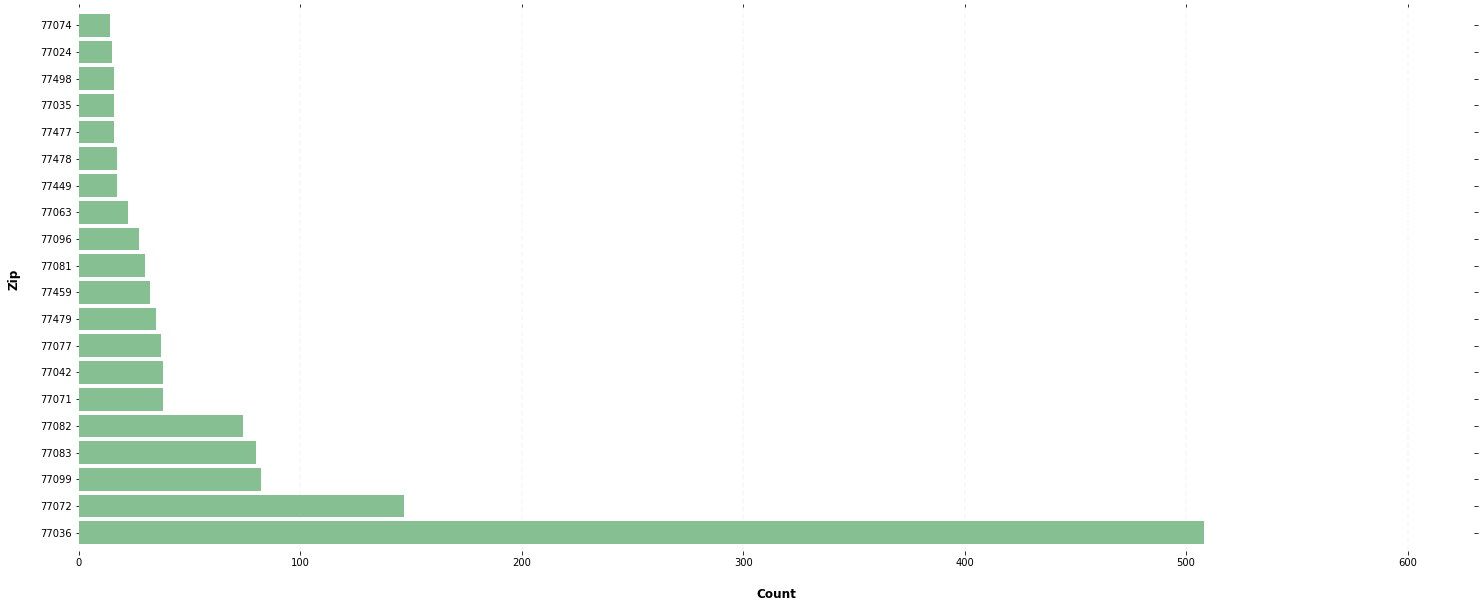

In [77]:
# Top 20 zip code

zip = df['Client: Mailing Zip/Postal Code'].value_counts().head(20)
ax = zip.plot(kind='barh', figsize=(25, 10), color='#86bf91', zorder=2, width=0.85)

#Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
     ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_xlabel("Count", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Zip", labelpad=20, weight='bold', size=12)


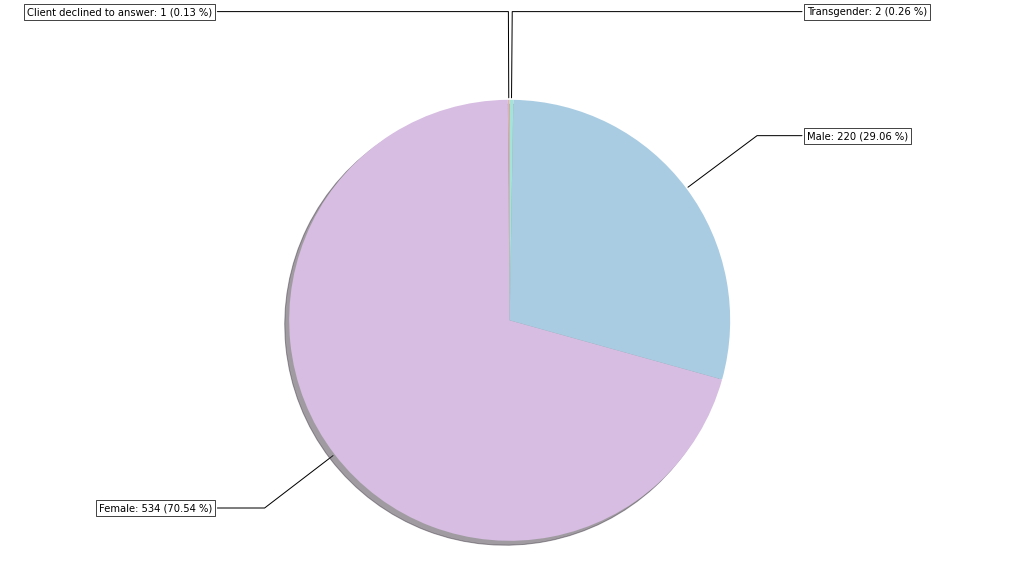

In [25]:
Sector = df.groupby('Gender').size()
labels = Sector.index.values
sizes = Sector.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' ({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#E6B0AA','#D7BDE2','#A9CCE3','#A3E4D7','#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

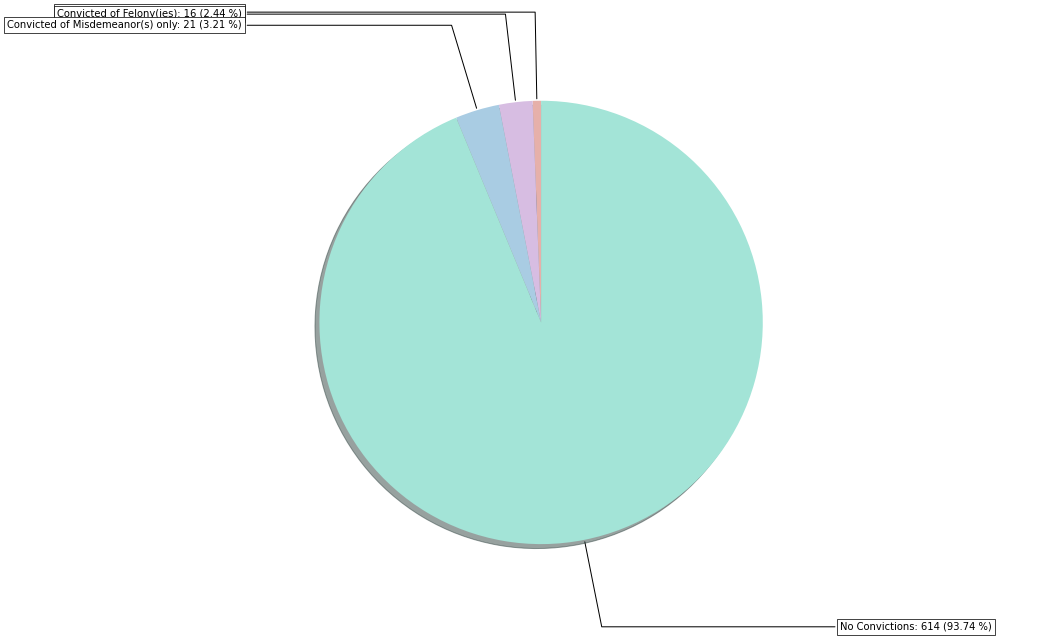

In [99]:
Sector = df.groupby("Client: Criminal Convictions").size()
labels = Sector.index.values
sizes = Sector.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' ({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#E6B0AA','#D7BDE2','#A9CCE3','#A3E4D7','#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

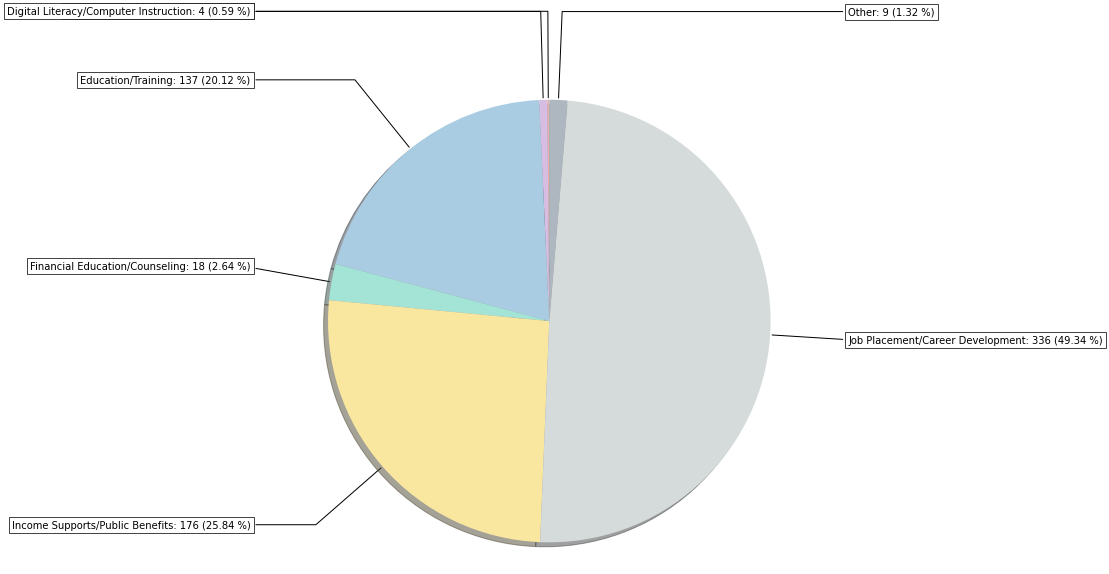

In [84]:
Sector = df.groupby("Client: Primary Interest at Program Entry").size()
labels = Sector.index.values
sizes = Sector.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' ({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#E6B0AA','#D7BDE2','#A9CCE3','#A3E4D7','#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [81]:
df.describe()

,Enrolled Year,Age,Client: Client Household: Household Size,Client: Client Household: Household Members Seniors,Client: Client Household: Household Members Under 18,"Client: For past 12 mos, # of full months worked",Client Household: Your Gross Household Income,"Client: For past 12 mos, earned income after tax",Number of Direct Services,Number of Services
count,1795.000000,1795.000000,1794.000000,1794.000000,1794.000000,519.00000,5.900000e+02,358.000000,93.000000,93.000000
mean,2015.300836,53.364903,1.223523,0.236343,0.133779,4.73025,1.907703e+05,8445.569832,6.000000,3.107527
std,2.282885,18.986294,0.828039,0.480397,0.526960,4.90572,4.116132e+06,13202.174830,6.595453,2.704515
min,2012.000000,5.000000,1.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,1.000000,1.000000
25%,2013.000000,39.000000,1.000000,0.000000,0.000000,0.00000,6.955500e+03,0.000000,1.000000,1.000000
50%,2016.000000,52.000000,1.000000,0.000000,0.000000,3.00000,1.452550e+04,4191.000000,3.000000,2.000000
75%,2016.000000,68.000000,1.000000,0.000000,0.000000,10.00000,2.653500e+04,11829.000000,9.000000,4.000000
max,2022.000000,101.000000,9.000000,3.000000,6.000000,12.00000,1.000000e+08,120000.000000,34.000000,15.000000


In [98]:
df.loc[df['Client Household: Your Gross Household Income'] == df['Client Household: Your Gross Household Income'].max()]

,Case Record 18-digit ID,Alternate database client #,Enrolled Date,Enrolled Year,Client: Full Name,Gender,Client: Mailing Zip/Postal Code,Client: Birthdate,Age,Client: Marital Status,Client: Race,Client: FFT Ethnicity,Client: Primary Language,Client: Client Household: Household Size,Client: Client Household: Household Members Seniors,Client: Client Household: Household Members Under 18,Client: Living Arrangement,Client: Highest Grade Completed,Client: Voc. Training/Bridge Program History,Client: In school/training at program entry?,"Client: For past 12 mos, # of full months worked",Client: Health Insurance Status,Client: Criminal Convictions,Client: Military Status,Client Household: Your Gross Household Income,"Client: For past 12 mos, earned income after tax",Client: Working at program entry?,Client: Primary Interest at Program Entry,Number of Direct Services,Number of Services,Reasons for Exit
1154,a0t36000005mMFVAA2,0013600000rzokJAAQ_262440,2015-08-11,2015,Joanna Lee,Female,77479,1966-07-09,56,Married living together,Asian,Non-Hispanic,Chinese,1.0,0.0,0.0,Owner,Bachelor,No vocational training/bridge program history,No,12.0,Private insurance through a household member's...,No Convictions,Never Served,100000000.0,NaN,Yes,Job Placement/Career Development,NaN,NaN,NaN
